In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.iforest import IForest

normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49666, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49666):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

n_estimators 1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      1.00      0.67      2166
       Relay       0.00      0.00      0.00      2166

    accuracy                           0.50      4332
   macro avg       0.25      0.50      0.33      4332
weighted avg       0.25      0.50      0.33      4332



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

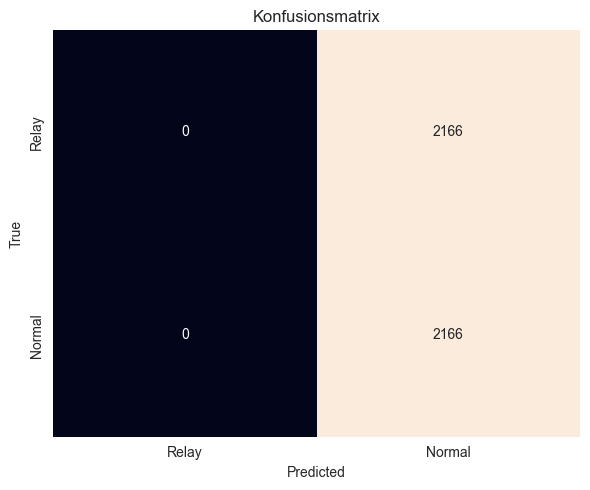

n_estimators 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.81      0.03      0.06      2166

    accuracy                           0.51      4332
   macro avg       0.66      0.51      0.37      4332
weighted avg       0.66      0.51      0.37      4332



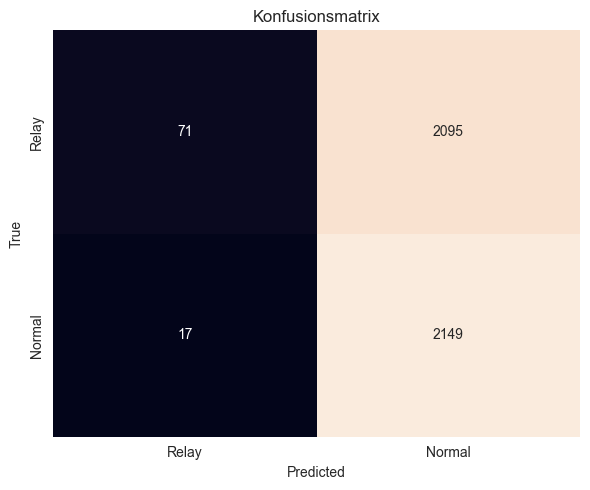

n_estimators 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2166
       Relay       0.71      0.02      0.03      2166

    accuracy                           0.50      4332
   macro avg       0.61      0.50      0.35      4332
weighted avg       0.61      0.50      0.35      4332



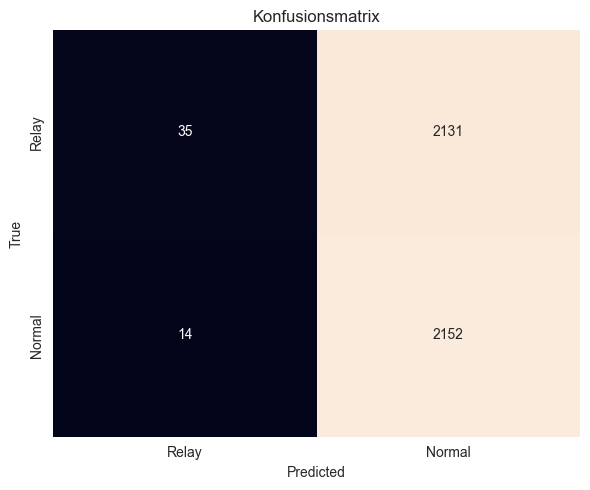

n_estimators 100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.77      0.04      0.07      2166

    accuracy                           0.51      4332
   macro avg       0.64      0.51      0.37      4332
weighted avg       0.64      0.51      0.37      4332



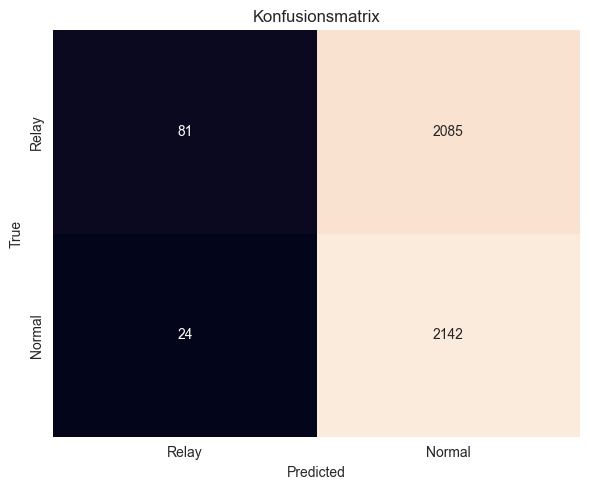

In [3]:
for n in {1,3,50,100}:
    clf = IForest(contamination=0.01, n_estimators=n)
    clf.fit(X_train)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"n_estimators {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

n_estimators 1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      1.00      0.67      2166
       Relay       0.47      0.00      0.01      2166

    accuracy                           0.50      4332
   macro avg       0.48      0.50      0.34      4332
weighted avg       0.48      0.50      0.34      4332



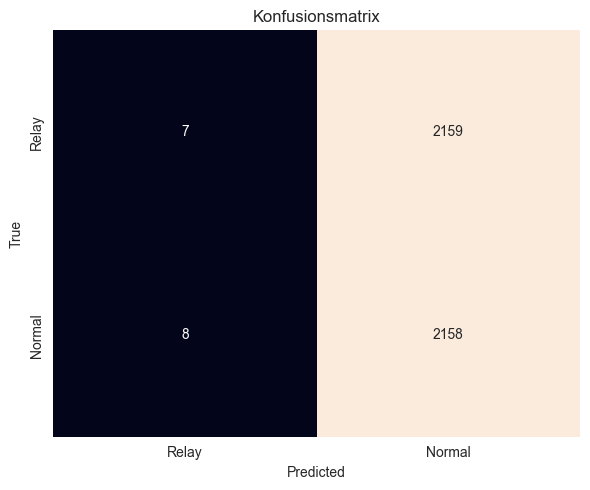

n_estimators 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.77      0.04      0.08      2166

    accuracy                           0.52      4332
   macro avg       0.64      0.52      0.38      4332
weighted avg       0.64      0.52      0.38      4332



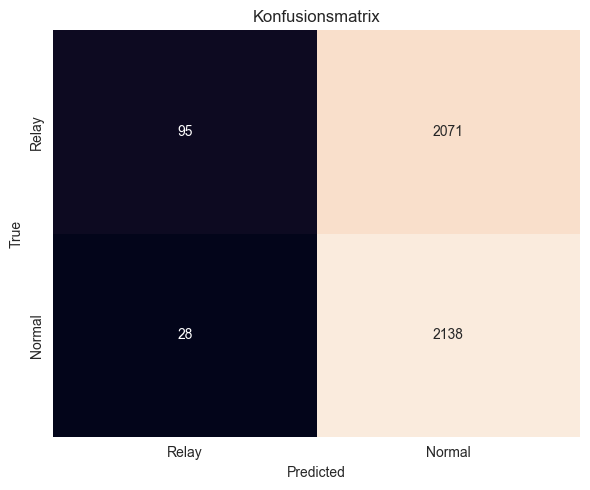

n_estimators 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      2166
       Relay       0.75      0.02      0.04      2166

    accuracy                           0.51      4332
   macro avg       0.63      0.51      0.36      4332
weighted avg       0.63      0.51      0.36      4332



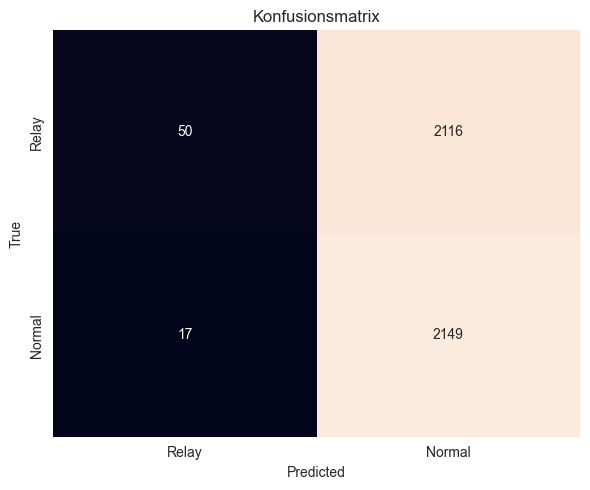

n_estimators 100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.82      0.04      0.07      2166

    accuracy                           0.51      4332
   macro avg       0.66      0.51      0.37      4332
weighted avg       0.66      0.51      0.37      4332



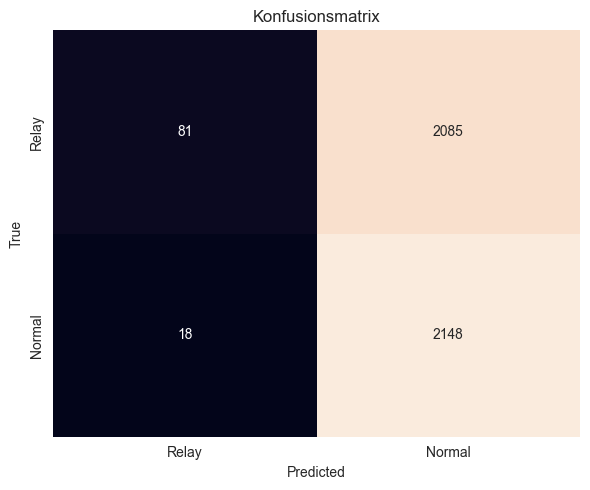

In [4]:
for n in {1,3,50,100}:
    clf = IForest(contamination=0.01, n_estimators=n)
    clf.fit(X_train_scaled_standard)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_standard)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"n_estimators {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()

n_estimators 1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.79      0.03      0.06      2166

    accuracy                           0.51      4332
   macro avg       0.65      0.51      0.37      4332
weighted avg       0.65      0.51      0.37      4332



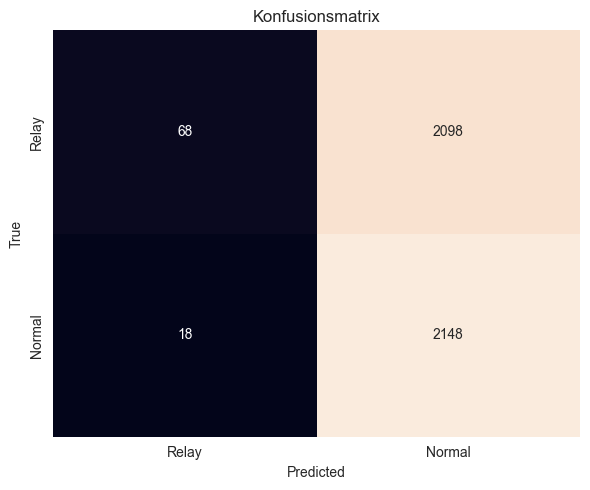

n_estimators 50

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.79      0.04      0.08      2166

    accuracy                           0.52      4332
   macro avg       0.65      0.52      0.38      4332
weighted avg       0.65      0.52      0.38      4332



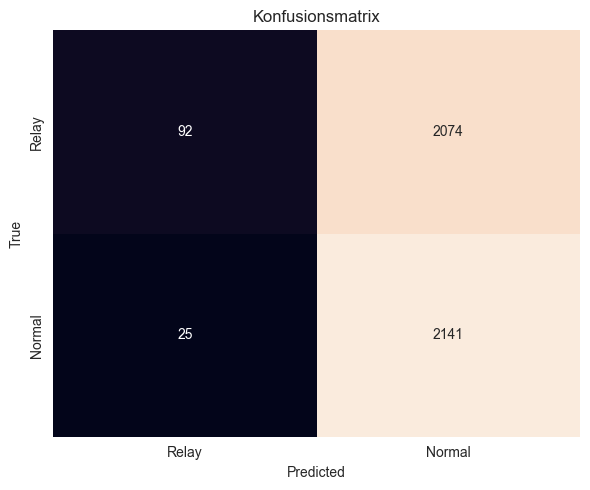

n_estimators 3

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.79      0.04      0.07      2166

    accuracy                           0.51      4332
   macro avg       0.65      0.51      0.37      4332
weighted avg       0.65      0.51      0.37      4332



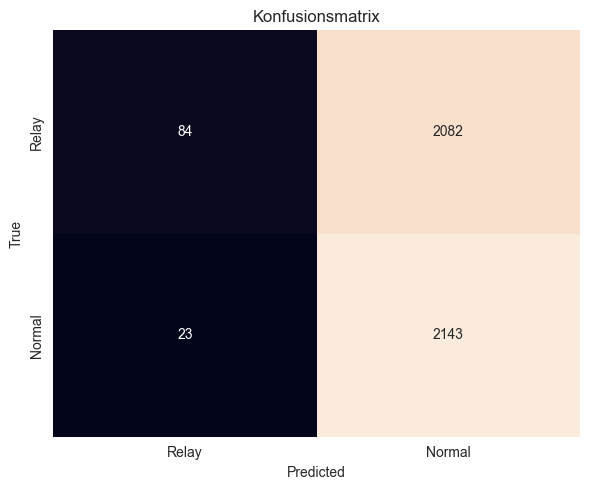

n_estimators 100

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.77      0.04      0.07      2166

    accuracy                           0.51      4332
   macro avg       0.64      0.51      0.37      4332
weighted avg       0.64      0.51      0.37      4332



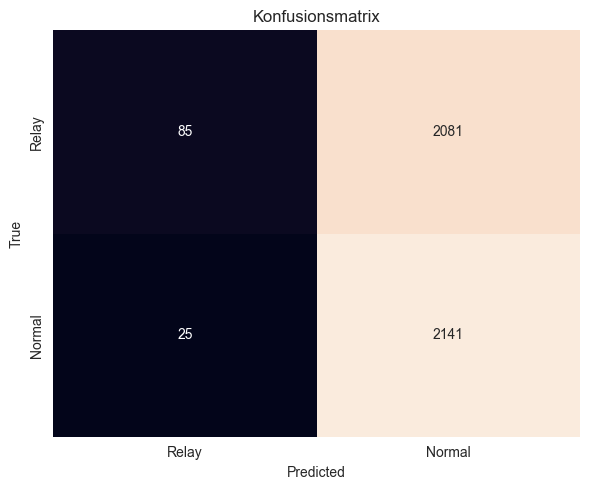

In [5]:
for n in {1,3,50,100}:
    clf = IForest(contamination=0.01,)
    clf.fit(X_train_scaled_minmax)

    # pyod.predict: 0 = inlier, 1 = outlier
    y_pred = clf.predict(X_test_combined_scaled_minmax)

    # cm und report
    cm = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(f"n_estimators {n}")
    print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

    # plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d",
                xticklabels=["Relay","Normal"],
                yticklabels=["Relay","Normal"],
                cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Konfusionsmatrix")
    plt.tight_layout()
    plt.show()